# ML Clustering - Network Intrusion Detection
## Part 2 - DATA PREPROCESSING

### 1. INITIALIZATION

In [45]:
# Import necessary libraries and modules
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [46]:
# Set display options
pd.set_option('display.max_columns', None)

### 2. LOADING DATASET

In [47]:
# Initialize required variables to read the cleaned data file
data_file_location = "..\\data\\interim\\"
data_file_name = "kddcup99_cleaned"
data_file_ext = ".csv"

# Read the dataset
data = pd.read_csv(data_file_location + data_file_name + data_file_ext, index_col=0)

### 3. EXPLORING DATASET

In [48]:
# Get a general overview of the column types
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4898431 entries, 0 to 4898430
Data columns (total 41 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   duration                     int64  
 1   protocol_type                object 
 2   service                      object 
 3   flag                         object 
 4   src_bytes                    int64  
 5   dst_bytes                    int64  
 6   land                         int64  
 7   wrong_fragment               int64  
 8   urgent                       int64  
 9   hot                          int64  
 10  num_failed_logins            int64  
 11  logged_in                    int64  
 12  num_compromised              int64  
 13  root_shell                   int64  
 14  su_attempted                 int64  
 15  num_root                     int64  
 16  num_file_creations           int64  
 17  num_shells                   int64  
 18  num_access_files             int64  
 19  

From the information provided by info() functions we observe the following:
- The majority of data fields are numerical.
- Only four out of the 41 fields are categorical.
- The dataset is originally labeled, and the attribute "labels" represents the classification of each sample. This attribute won't be used during the analysis but we will rely on it later on as a "ground truth" to evaluate the clustering results.

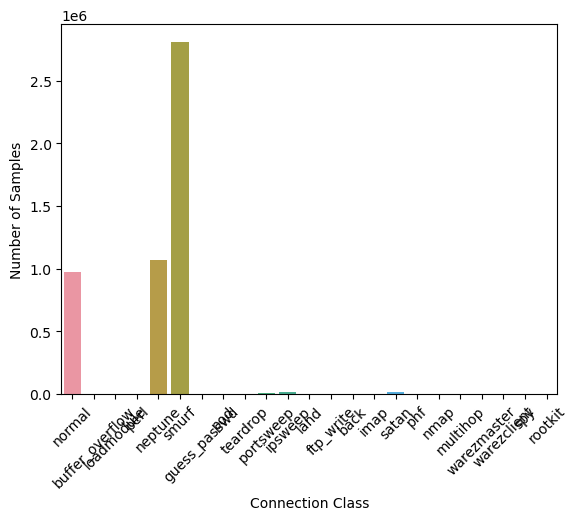

In [49]:
# Check the distribution of classes for all connection samples
count_plot = sns.countplot(data=data, x="labels")
count_plot.set_xticklabels(count_plot.get_xticklabels(), rotation=45)
plt.xlabel("Connection Class")
plt.ylabel("Number of Samples")
plt.show()

- As the chart clearly shows, the dataset is not equally distributed and the majority of samples are of normal classification. This is quite expected since we are using the "SA" version of the KDD Cup '99 dataset.
- In this version of the dataset, we have 9 different classes being one of them normal and the other 8 are malicious.
- As a primary goal of this anomaly analysis, we try to differentiate in this demo between only two potential types of connections, normal and abnormal. While we keep the further analysis of malicious samples subtypes for a later "more sophisticated" study.

### 4. ENCODING CATEGORICAL FEATURES

In [20]:
# Check the unique values of categorical features
categorical_features = ["protocol_type", "service", "flag"]
for c in categorical_features:
    print(f"Feature {c} has {data[c].nunique()} unique values.")

Feature protocol_type has 3 unique values.
Feature service has 70 unique values.
Feature flag has 11 unique values.


Since there is no implicit order between the values of categorical attributes, we will use the One-Hot Encoding mechanism to transfer each value into a vector of 1 and 0s, representing the absence/presence of this certain value in each sample.

In [21]:
# Initialize the encoder with its default parameters
ohe = OneHotEncoder()

# Fit the encoder to categorical features in the dataset
encoded_features = ohe.fit_transform(data[categorical_features])

# Create a DataFrame of encoded features
encoded_features_df = pd.DataFrame(encoded_features.toarray(), columns=ohe.get_feature_names_out())

# Check encoding results 
encoded_features_df

,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,service_csnet_ns,service_ctf,service_daytime,service_discard,service_domain,service_domain_u,service_echo,service_eco_i,service_ecr_i,service_efs,service_exec,service_finger,service_ftp,service_ftp_data,service_gopher,service_harvest,service_hostnames,service_http,service_http_2784,service_http_443,service_http_8001,service_imap4,service_iso_tsap,service_klogin,service_kshell,service_ldap,service_link,service_login,service_mtp,service_name,service_netbios_dgm,service_netbios_ns,service_netbios_ssn,service_netstat,service_nnsp,service_nntp,service_ntp_u,service_other,service_pm_dump,service_pop_2,service_pop_3,service_printer,service_private,service_red_i,service_remote_job,service_rje,service_shell,service_smtp,service_sql_net,service_ssh,service_sunrpc,service_supdup,service_systat,service_telnet,service_tftp_u,service_tim_i,service_time,service_urh_i,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois,flag_OTH,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4898426,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4898427,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4898428,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

As shown in this overview and with referring to the One-Hot Encoding algorithm, the total number of resulting columns is 65, which matches the sum of all distinct values of considered features (3+52+10=65)

In [22]:
# Merge encoded features with original dataset and drop categorical columns
data = pd.concat([data, encoded_features_df], axis=1).drop(categorical_features, axis=1)

In [23]:
# Check new dataset dimensions
data.shape

(4898431, 122)

The dimensions of the dataset, namely columns number, has increased due to the encoding process, so we might consider some approaches for dimensionality reduction in the upcoming steps.

In [24]:
# Check data fields type
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4898431 entries, 0 to 4898430
Columns: 122 entries, duration to flag_SH
dtypes: float64(99), int64(22), object(1)
memory usage: 4.5+ GB


Now we have all columns are numerical except for one, the class label which will be ignored during the analysis step and reconsidered later for evaluation.

### 5. DATA NORMALIZATION

Since the number of features in the original dataset was relatively high, and it was further increased as a result of categorical features encoding, we feel it might be useful to reduce the dimensionality of the dataset.

To do so, we will apply the Principle Component Analysis (PCA) technique which is very common to solve such types of problems. However, since PCA implies implementing euclidean distance calculations, the features are supposed to be normalized to the same scale.

For this reason, we will apply a standard scaler to transfer each variable to a new value distribution so that the mean would be 0 and standard deviation is 1.

In [51]:
# Initiate StandardScaler with its default parameters
scaler = StandardScaler()

# Apply scaler to all features and store results in a new DataFrame
data_attributes = data.columns.drop("labels")
data[data_attributes] = scaler.fit_transform(data[data_attributes].values)

In [26]:
# Check the attribute distributions after scaling
data.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,service_csnet_ns,service_ctf,service_daytime,service_discard,service_domain,service_domain_u,service_echo,service_eco_i,service_ecr_i,service_efs,service_exec,service_finger,service_ftp,service_ftp_data,service_gopher,service_harvest,service_hostnames,service_http,service_http_2784,service_http_443,service_http_8001,service_imap4,service_iso_tsap,service_klogin,service_kshell,service_ldap,service_link,service_login,service_mtp,service_name,service_netbios_dgm,service_netbios_ns,service_netbios_ssn,service_netstat,service_nnsp,service_nntp,service_ntp_u,service_other,service_pm_dump,service_pop_2,service_pop_3,service_printer,service_private,service_red_i,service_remote_job,service_rje,service_shell,service_smtp,service_sql_net,service_ssh,service_sunrpc,service_supdup,service_systat,service_telnet,service_tftp_u,service_tim_i,service_time,service_urh_i,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois,flag_OTH,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
count,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06
mean,-1.955576e-16,4.241050e-18,-1.064705e-18,4.801326e-19,-1.854965e-17,3.191214e-20,8.552163e-17,2.955789e-17,-3.111097e-15,5.751437e-19,5.863710e-17,1.825519e-17,1.095384e-17,2.500461e-17,-1.628679e-17,-5.968730e-17,-4.043413e-19,2.779837e-17,1.723023e-16,-1.121451e-16,5.226628e-16,-2.062801e-16,7.187310e-16,-2.285605e-16,2.272608e-16,-1.630188e-16,-4.857143e-16,1.352796e-15,6.871670e-16,-2.199083e-15,-8.243775e-17,-2.736785e-16,4.298275e-16,8.590979e-16,-8.398810e-16,-7.905855e-16,-5.139827e-16,2.131499e-16,3.813674e-16,1.643185e-16,-3.524841e-18,-5.742734e-18,-4.337150e-18,-9.783971e-19,3.933316e-17,-4.725897e-18,1.586904e-18,-9.042739e-18,-4.313941e-18,1.230068e-

As this statistical overview shows, all attributes have their standard deviations equals to 1 and means equals to 0 (very close to 0 due to limitations with numerical representation).

### 6. STORE PROCESSED DATASET

In [14]:
# Set file location and name
data_file_location = "..\\data\\processed\\"
data_file_name = "kddcup99_processed"
data_file_ext = ".csv"

# Store processed dataset to a csv file
data.to_csv(data_file_location + data_file_name + data_file_ext)

To be performed:
- PCA
- Check best k value
- Apply KMeans
- Compare with original classes